In [1]:
''' 
    This prorgram calculates the transmission vs. frequency for both arms of a Y-shaped 3 port demultiplexer where one arm has two Helmholtz resonators in a U-shape configuration 
    and the other has two Helmholtz Resonators directly across from one another. To accomplish this, it replicates the work of T. Gu. et. al. (2021) "Induced transparency based subwavelength 
    acoustic demulitplexers". Specifically, it looks to replicate the graph presented in Figure 7 of this article. One adjustment that had to be made to the original paper is to use an adjusted l_n value as the one given appears to be the physical rather than 
    the effective length. The program contains the functions calculate_tu, calculate_ru, calculate_fr, calculate_tc, calculate_rc, calculate_tla, calculate_tlb, calculate_Y, calculate_R, 
    calculate_T1, and calculate_T2, the details of which are provided below. 
    
    Authors: Kyle Sprague, Bill Robertson

    Date Written: 23 June 2022
    
'''

' \n    This prorgram calculates the transmission vs. frequency for both arms of a Y-shaped 3 port demultiplexer where one arm has two Helmholtz resonators in a U-shape configuration \n    and the other has two Helmholtz Resonators directly across from one another. To accomplish this, it replicates the work of Gu. et. al. (2021) "Induced transparency based subwavelength \n    acoustic demulitplexers". One adjustment that had to be made to the original paper is to use an adjusted l_n value as the one given appears to be the physical rather than \n    the effective length. The program contains the functions calculate_tu, calculate_ru, calculate_fr, calculate_tc, calculate_rc, calculate_tla, calculate_tlb, calculate_Y, calculate_R, \n    calculate_T1, and calculate_T2, the details of which are provided below. \n    \n    Authors: Kyle Sprague, Bill Robertson\n\n    Date Written: 23 June 2022\n    \n'

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def calculate_tu(frequency_list, z_0, rho, r_n, l_n, m_n, c, D, S, Ra, s_n, r_c, s_c, L):     
    #parameters used for their MT calculation: all Helmholtz resonatos bhave neck lengths rn = 4mm and ln = 5mm and cavity radius (Rc) = 6mm; tube in this work has cross
    #sectional diameter D = 29 and S is the cross sectional area of the tube. L = 68.5mm
    ''' 
        Function to calculate the transmittance associated with two HRs hanging off the side of one cylinder such that they create a U shape. For each 
        frequency in frequency_list, MT, the matrix given by equation (8) in T. Gu et. al. is calculated. For each HR height, the volume of the HR is calculated 
        and plugged into the impedance formulae Z1 and Z2, which allow us to calculate Mi (equation 7 in the T. Gu et. al. paper). After this, tu is calculated.

        array -- frequency_list: the array of frequency values surrounding the resonant frequency
        float -- z_0: the initial impedance of the system
        float -- rho: the density of air in the material 
        float -- r_n: the radius of the neck 
        float -- l_n: the length of the neck 
        float -- m_n: the acoustic mass  
        int -- c: speed of sound in the material 
        float -- D: diameter of the large tube  
        float -- S: surface area of the large tube 
        float -- s_n: surface area of the neck 
        float -- r_c: radius of the cavity (aka the part of the HR that is not the neck) 
        float -- s_c: surface area of the cavity 
        float -- L: length of the large tube (aka the cylinder) 
        
        returns: the absolute value of transmittance for each of the given frequencies as an array
    '''
    transmittance_list = np.zeros(len(frequency_list), dtype = complex) 
    height_list = [22/1000, 15/1000] #22mm and 15mm are the heights of the HRs given in mm 
    
    for i in range(len(frequency_list)-1): 
        
        frequency = frequency_list[i]   
        k = (2*np.pi*frequency)/c  
        w = 2*np.pi*frequency
        MT = np.array([
                [np.cos(k*L), 1j*(c/S)*np.sin(k*L)],
                [1j*(S/c)*np.sin(k*L), np.cos(k*L)]  
            ]) #equation 8 in T. Gu et. al.  

        for j in range(len(height_list)-1):  
           
            h_1 = height_list[j]    
            h_2 = height_list[j+1]   

            v_1 = s_c * h_1 #volumne of HR1   
            v_2 = s_c * h_2 #volume of HR2  
            
            z_1 = Ra + 1j*(((w*l_n*rho)/s_n)-(rho*c**2)/(w*v_1)) 
            z_2 = Ra + 1j*(((w*l_n*rho)/s_n)-(rho*c**2)/(w*v_2)) 

            m_1 = np.array([[1,0],[(S/c)*(z_0/z_1), 1]]) 
            m_2 = np.array([[1,0],[(S/c)*(z_0/z_2), 1]])  
    
            M = m_1 @ MT @ m_2   
  
            A,B,C,D = M[0,0], M[0,1], M[1,0], M[1,1]  
            t_u = 2/(abs(A + B*(S/c) + C*(c/S) + D)) #equation 2 in T. Gu. et al.

            transmittance_list[i] = t_u     

    t_u_abs = (np.abs(transmittance_list)) 
    return t_u_abs  
            


In [4]:
def calculate_ru(frequency_list, z_0, rho, r_n, l_n, m_n, c, D, S, Ra, s_n, r_c, s_c, L):   
    
    ''' 
        Function to calculate the reflectivity associated with two HRs hanging off the side of one cylinder such that they create a U shape. For each 
        frequency in frequency_list, MT, the matrix given by equation (8) in T. Gu et. al. is calculated. For each HR height, the volume of the HR is calculated 
        and plugged into the impedance formulae Z1 and Z2, which allow us to calculate Mi (equation 7 in the T. Gu et. al. paper). After this, ru is calculated. Notice 
        that the equation to calculate ru is different than that for tu. 

        array -- frequency_list: the array of frequency values surrounding the resonant frequency
        float -- z_0: the initial impedance of the system
        float -- rho: the density of air in the material 
        float -- r_n: the radius of the neck 
        float -- l_n: the length of the neck 
        float -- m_n: the acoustic mass  
        int -- c: speed of sound in the material 
        float -- D: diameter of the large tube  
        float -- S: surface area of the large tube 
        float -- s_n: surface area of the neck 
        float -- r_c: radius of the cavity (aka the part of the HR that is not the neck) 
        float -- s_c: surface area of the cavity 
        float -- L: length of the large tube (aka the cylinder) 
        
        returns: the absolute value of reflectivity for each of the given frequencies as an array

    ''' 
    
    reflectivity_list = np.zeros(len(frequency_list), dtype = complex) 
    height_list = [22/1000, 15/1000] #22mm and 15mm are the heights of the HRs given in mm 
    
    for i in range(len(frequency_list)-1): 
        
        frequency = frequency_list[i]   
        k = (2*np.pi*frequency)/c #in m  
        w = 2*np.pi*frequency  
        MT = np.array([
                [np.cos(k*L), 1j*(c/S)*np.sin(k*L)],
                [1j*(S/c)*np.sin(k*L), np.cos(k*L)]  
            ]) #equation 8 in T. Gu etal.

        for j in range(len(height_list)-1):  
           
            h_1 = height_list[j]    
            h_2 = height_list[j+1]   

            v_1 = s_c * h_1 #volumne of HR1   
            v_2 = s_c * h_2 #volume of HR2  

            z_1 = Ra + 1j*(((w*l_n*rho)/s_n)-(rho*c**2)/(w*v_1))
            z_2 = Ra + 1j*(((w*l_n*rho)/s_n)-(rho*c**2)/(w*v_2)) 

            m_1 = np.array([[1,0],[(S/c)*(z_0/z_1), 1]]) 
            m_2 = np.array([[1,0],[(S/c)*(z_0/z_2), 1]])   
    
            M = m_1 @ MT @ m_2   
  
            A,B,C,D = M[0,0], M[0,1], M[1,0], M[1,1]  
            r_u = abs((A + B*(S/c) - C*(c/S) - D)/(A+B*(S/c)+C*(c/S)+D)) #equation 2 in T. Gu et al.

            reflectivity_list[i] = r_u     

    r_u_abs = (np.abs(reflectivity_list)**2)
    return r_u_abs  



In [5]:
def calculate_fr(H_list, l_n, s_n, s_c, c): #this function is based on equation 5 from Gu et. al 

    ''' 
    Function that calculates the resonant frequency using equation 5 in Gu et. al. by using an arbitrary number of heights in mm and converting these to m.
    
    list -- H_list: an array of height values given in mm 
    float -- l_n: length of the neck 
    float -- s_n: surface area of the neck 
    flaot -- s_c: surface area of the cavity 
    int -- c: speed of sound in the material
    
    returns: array of resonant frequencies corresponding to different cavity heights 
    ''' 

    frequency_list = np.zeros(len(H_list))
    for i in range (len(H_list)): 
        frequency = (c/2*np.pi)*np.sqrt(s_n/(l_n*s_c*(H_list[i]/1000))) #equation 5 in T. Gu et al.
        frequency_list[i] = frequency  
    return frequency_list 



In [6]:
def calculate_tc(frequency_list, z_0, rho, r_n, l_n, m_n, c, D, S, Ra, s_n, r_c, s_c, L):  
    ''' 
        Function to calculate the transmittance associated with two HRs hanging off opposite sides of a cylinder. For each 
        frequency in frequency_list, MT, the matrix given by equation (8) in Gu et. al. is calculated. For each HR height, the volume of the HR is calculated 
        and plugged into the impedance formulae Z1 and Z2, which allow us to calculate Mi (equation 7 in the T. Gu et. al. paper). After this, tc is calculated. The 
        key difference between this and the Tu equation is the difference in heights 

        array -- frequency_list: the array of frequency values surrounding the resonant frequency
        float -- z_0: the initial impedance of the system
        float -- rho: the density of air in the material 
        float -- r_n: the radius of the neck 
        float -- l_n: the length of the neck 
        float -- m_n: the acoustic mass  
        int -- c: speed of sound in the material 
        float -- D: diameter of the large tube  
        float -- S: surface area of the large tube 
        float -- s_n: surface area of the neck 
        float -- r_c: radius of the cavity (aka the part of the HR that is not the neck) 
        float -- s_c: surface area of the cavity 
        float -- L: length of the large tube (aka the cylinder) 
        
        returns: the absolute value of transmittance for each of the given frequencies as an array
    ''' 

    transmittance_list = np.zeros(len(frequency_list), dtype = complex) 
    height_list = [18/1000, 12.5/1000] #18mm and 12.5mm are the heights of the HRs given in mm 
    
    for i in range(len(frequency_list)-1): 
        
        frequency = frequency_list[i]   
        k = (2*np.pi*frequency)/c #in m  
        w = 2*np.pi*frequency   
        MT = np.array([
                [np.cos(k*L), 1j*(c/S)*np.sin(k*L)],
                [1j*(S/c)*np.sin(k*L), np.cos(k*L)]  
            ]) #equation 8 in T. Gu et al. 

        for j in range(len(height_list)-1):  
           
            h_1 = height_list[j]    
            h_2 = height_list[j+1]   

            v_1 = s_c * h_1 #volumne of HR1   
            v_2 = s_c * h_2 #volume of HR2  

            z_1 = Ra + 1j*(((w*l_n*rho)/s_n)-(rho*c**2)/(w*v_1))
            z_2 = Ra + 1j*(((w*l_n*rho)/s_n)-(rho*c**2)/(w*v_2)) 

            m_1 = np.array([[1,0],[(S/c)*(z_0/z_1), 1]]) 
            m_2 = np.array([[1,0],[(S/c)*(z_0/z_2), 1]])   
    
            M = m_1 @ MT @ m_2   
  
            A,B,C,D = M[0,0], M[0,1], M[1,0], M[1,1]  
            t_c = 2/(abs(A + B*(S/c) + C*(c/S) + D)) #equation 2 in T. Gu et. al. 

            transmittance_list[i] = t_c     


    t_c_abs = (np.abs(transmittance_list))
    return t_c_abs   



In [7]:
def calculate_rc(frequency_list, z_0, rho, r_n, l_n, m_n, c, D, S, Ra, s_n, r_c, s_c, L): 
    ''' 
        Function to calculate the reflectivity associated with two HRs hanging off opposite sides of one cylinder such that they create a cross shape. For each 
        frequency in frequency_list, MT, the matrix given by equation (8) in T. Gu et. al. is calculated. For each HR height, the volume of the HR is calculated 
        and plugged into the impedance formulae Z1 and Z2, which allow us to calculate Mi (equation 7 in the Gu et. al. paper). After this, rc is calculated. Notice 
        that the equation to calculate ru is different than that for tu. The key difference between this function and the ru function is that we are working with
        HR's with different height values. 

        array -- frequency_list: the array of frequency values surrounding the resonant frequency
        float -- z_0: the initial impedance of the system
        float -- rho: the density of air in the material 
        float -- r_n: the radius of the neck 
        float -- l_n: the length of the neck 
        float -- m_n: the acoustic mass  
        int -- c: speed of sound in the material 
        float -- D: diameter of the large tube  
        float -- S: surface area of the large tube 
        float -- s_n: surface area of the neck 
        float -- r_c: radius of the cavity (aka the part of the HR that is not the neck) 
        float -- s_c: surface area of the cavity 
        float -- L: length of the large tube (aka the cylinder) 
        
        returns: the absolute value of reflectivity for each of the given frequencies as an array
    '''
    
    reflectivity_list = np.zeros(len(frequency_list), dtype = complex) 
    height_list = [18/1000, 12.5/1000] #22mm and 15mm are the heights of the HRs given in mm 
    
    for i in range(len(frequency_list)-1): 
        
        frequency = frequency_list[i]   
        k = (2*np.pi*frequency)/c #in m  
        w = 2*np.pi*frequency    

        MT = np.array([
                [np.cos(k*L), 1j*(c/S)*np.sin(k*L)],
                [1j*(S/c)*np.sin(k*L), np.cos(k*L)]  
            ]) #equation 8 in T. Gu et al.

        for j in range(len(height_list)-1):  
           
            h_1 = height_list[j]    
            h_2 = height_list[j+1]   

            v_1 = s_c * h_1 #volumne of HR1   
            v_2 = s_c * h_2 #volume of HR2  

            z_1 = Ra + 1j*(((w*l_n*rho)/s_n)-(rho*c**2)/(w*v_1))
            z_2 = Ra + 1j*(((w*l_n*rho)/s_n)-(rho*c**2)/(w*v_2)) 

            m_1 = np.array([[1,0],[(S/c)*(z_0/z_1), 1]]) 
            m_2 = np.array([[1,0],[(S/c)*(z_0/z_2), 1]])   
    
            M = m_1 @ MT @ m_2   
  
            A,B,C,D = M[0,0], M[0,1], M[1,0], M[1,1]  
            r_c = abs((A + B*(S/c) - C*(c/S) - D)/(A+B*(S/c)+C*(c/S)+D)) #equation 2 in T. Gu et al. 

            reflectivity_list[i] = r_c     

    r_c_abs = (np.abs(reflectivity_list)**2) #CHANGE TO NOT BE SQUARED
    return r_c_abs   



In [8]:
def calculate_tla(frequency_list, S, la, c):  #CHANGE L value and find new S 
    ''' 
    Function to find the transmittance associated with section La of Figure 4 in Gu et. al by using equation 7 from this paper to calculate MT and
    equation 2 to calculate transmittance thereafter by pulling out the values in the matrix M. 
    
    list -- frequency_list: the array of frequency values around the resonant frequency 
    float -- S: surface area of the cylinder  
    float -- L: length of the cylinder
    int -- c: speed of sound in the material 
    
    returns: absolute value of the transmittance for the section of the 3 port demultiplexer t_la
    '''
   
    transmittance_list =  np.zeros(len(frequency_list), dtype = complex)
   
    for index in range (0, len(frequency_list)):  
        k = (2*np.pi*frequency_list[index])/c 
        MT = np.array([
        [np.cos(k*la), 1j*(c/S)*np.sin(k*la)],
        [1j*(S/c)*np.sin(k*la), np.cos(k*la)]  
            ])     
        A,B,C,D = MT[0,0], MT[0,1], MT[1,0], MT[1,1]  
        t_la = 2/(abs(A + B*(S/c) + C*(c/S) + D)) 


        transmittance_list[index] = t_la 
   
    t_la_abs = (np.abs(transmittance_list)) 
    return t_la_abs
        
        
    


In [9]:
def calculate_tlb(frequency_list, S, la, c):  #CHANGE L value and find new S 
    ''' 
    Function to find the transmittance associated with section La of Figure 4 in Gu et. al by using equation 7 from this paper to calculate MT and
    equation 2 to calculate transmittance thereafter by pulling out the values in the matrix M. 
    
    list -- frequency_list: the array of frequency values around the resonant frequency 
    float -- S: surface area of the cylinder  
    float -- L: length of the cylinder
    int -- c: speed of sound in the material 
    
    returns: absolute value of the transmittance for the section of the 3 port demultiplexer t_la
    '''
   
    transmittance_list =  np.zeros(len(frequency_list), dtype = complex)
   
    for index in range (0, len(frequency_list)):  
        k = (2*np.pi*frequency_list[index])/c 
        MT = np.array([
        [np.cos(k*la), 1j*(c/S)*np.sin(k*la)],
        [1j*(S/c)*np.sin(k*la), np.cos(k*la)]  
            ])     
        A,B,C,D = MT[0,0], MT[0,1], MT[1,0], MT[1,1]  
        t_lb = 2/(abs(A + B*(S/c) + C*(c/S) + D)) 


        transmittance_list[index] = t_lb 
   
    t_lb_abs = (np.abs(transmittance_list)) 
    return t_lb_abs


In [10]:
def calculate_Y(frequency_list,tu,ru,tc,rc,tla, tlb):  
    ''' Function that finds the value of Y (equation 18 in Gu et. al.) by looping through a list of frequencies, using the transmittance and reflectivity  
    values at each frequency for a given arm. These are then used to create a Y_list. 
    
    array -- frequency_list: array of frequencies surrounding the reosnant frequency 
    array -- tu: transmittance for the u-shaped resonator system  
    array -- ru: reflectivity for the u-shaped resonator system 
    array -- tc: transmittance for the cross-shaped resonator system 
    array -- rc: reflectivity for the cross shaped resonator system 
    array -- tla: transmittance for one section of the U-shaped resonator system containing arm 
    array -- tlb: transmittance for one section of the cross-shaped resonator system containing arm 
    
    returns Y as an array
       ''' 
    
    Y_list = np.zeros(len(frequency_list))
    for i in range (len(frequency_list)-1):
        
        Y_num_1 = (1/(tla[i]*tu[i]))-((ru[i]*tla[i])/tu[i]) #one piece of numerator for Y equation given in Gu et al Induced transparency based #subwavelength acoustic demultiplexers 
        Y_num_2 = ((1/(tlb[i]*tc[i]))-((rc[i]*tlb[i])/tc[i]))  
        Y_denom_1 = (1/(tla[i]*tu[i])) +((ru[i]*tla[i])/tu[i])  
        Y_denom_2 = (1/(tlb[i]*tc[i]))+((rc[i]*tlb[i])/tc[i])  
        Y = (Y_num_1/Y_denom_1) + (Y_num_2/Y_denom_2)   
        Y_list[i] = Y
    
    return Y_list
    

In [11]:
def calculate_R(frequency_list, Y):  
    
    ''' Function that uses Y to calculate Y in accordance with equation 22 of Gu. et. al. 
    
        array -- frequency_list: array of frequencies surrounding the resonant frequency  
        array -- Y: array of Y values   
        
        Returns: reflection coefficients for each frequency as an array
    
    '''
    
    R_list = np.zeros(len(frequency_list)) 
    
    for i in range(len(frequency_list)-1): 
        R = (1 - Y[i])/(1 + Y[i])  
        R_list[i] = R 
    
    return R_list
        

In [12]:
def calculate_T1(frequency_list, R, tla, tu, ru): 
    ''' 
        Determines transmittance through the arm of the 3 port demultiplixer witht he U-shaped resonator system using equation 20 of Gu. et. al. 
        
        array -- frequency_list: array of frequencies surrounding the resonant frequency 
        array -- R: reflection coefficients for each frequency 
        array -- tla: transmittance for one section of the U-shaped resonator system containing arm  
        array -- tu:  transmittance for the u-shaped resonator system 
        array -- ru: reflectivity for the u-shaped resonator system 
        
        Returns: Array of transmission values through the first arm
    '''
    T1_list = np.zeros(len(frequency_list)) 
    
    for i in range(len(frequency_list)-1): 
        T1 = (1+R[i])/(((1)/(tla[i]*tu[i]))+((ru[i]*tla[i])/(tu[i]))) 
        T1_list[i] = T1
    
    T1_abs = np.abs(T1_list)

    return T1_abs
        

In [13]:
def calculate_T2(frequency_list, R, tlb, tc, rc): 
    ''' 
        Determines transmittance through the arm of the 3 port demultiplixer witht he U-shaped resonator system using equation 20 of Gu. et. al. 
        
        array -- frequency_list: array of frequencies surrounding the resonant frequency 
        array -- R: reflection coefficients for each frequency 
        array -- tlb: transmittance for one section of the cross-shaped resonator system containing arm 
        array -- tc: transmittance for the cross-shaped resonator system 
        array -- rc: reflectivity for the cross shaped resonator system
        
        Returns: Array of transmission values through the second arm
    '''
    T2_list = np.zeros(len(frequency_list)) 
    
    for i in range(len(frequency_list)-1): 
        T2 = (1+R[i])/(((1)/(tlb[i]*tc[i]))+((rc[i]*tlb[i])/(tc[i]))) 
        T2_list[i] = T2
    
    T2_abs = np.abs(T2_list)
    return T2_abs

In [14]:
def main():    
    
    z_0 = ((1.2)*(342)/((np.pi*(0.029/2)**2))) #in order to calculate initial impedance, we need to use the equation given on page 3 of T. Gu et al. 
    #"Induced transparency based subwavelength acoustic demultiplexers" as Z0 = rho*c/s where rho = 1.2kg*m^-3 
    #and S = (np.pi(29mm/2)^2)(1m/1000mmm)   

    frequency_list = np.arange(50,5000,1) #50 to 30000 is a good range 
    rho = 1.2 #density in kg*m**-3 
    r_n = 0.004 #in meters; the radius of the neck length 
    #l_n = 0.005 #length of neck in meters given in mm and converted here to m  
    l_n = 0.01083 #to get this value equation 3 was used from Ji (2004), "Acoustic length correction of closed cylindrical side-branced tube" where a_b is nech radius 
    #and a_p is pipe radius 
    m_n = (0.005*rho)/(np.pi*(r_n)**2) #acoustic mass rn is given as 4mm  
    c = 342 #speed of sound in m/s  
    D = (29)*(1/1000) #diameter of the cylinder in meters  
    L = 68.5 *(1/1000) 
    S = np.pi*((D/2)**2) #surface area of the cylinder 
    Ra = 80000 #just a constant: see APP A of reference material T. Gu et al. 
    s_n = np.pi*((r_n)**2)   
    r_c = 0.006 #in meters; the radius of the Helmholtz cavity given initially in mm but converted here to meters 
    s_c =  np.pi*((r_c)**2)  #radius of the cavity squared  
 
    H_list = np.arange(1,30,1) 
    
    la = 0.0263 #the length of the first section of one arm of the three port demultiplixer as given by T. Gu et al. "Induced transparency based 
    #subwavelength acoustic demultiplexers 
    lb = 0.0263 #the length of the first section of one arm of the three port demultiplixer as given by T. Gu et al. "Induced transparency based 
    #subwavelength acoustic demultiplexers 
    
    tu = calculate_tu(frequency_list, z_0, rho, r_n, l_n, m_n, c, D, S, Ra, s_n, r_c, s_c, L)  #transmittance u-shaped HR pair
    ru = calculate_ru(frequency_list, z_0, rho, r_n, l_n, m_n, c, D, S, Ra, s_n, r_c, s_c, L)   #reflectivity for u-shaped HR pair 
    tc = calculate_tc(frequency_list, z_0, rho, r_n, l_n, m_n, c, D, S, Ra, s_n, r_c, s_c, L)  #transmittance cross-shaped HR pair 
    rc = calculate_rc(frequency_list, z_0, rho, r_n, l_n, m_n, c, D, S, Ra, s_n, r_c, s_c, L)  #reflectivity for cross-shaped HR pair  
   
    tla = calculate_tla(frequency_list, S, la, c) #transmission coefficient for first section of one arm of 3 port demultiplexer
    tlb = calculate_tlb(frequency_list, S, lb, c) #transmission coefficient for first section of one arm of 3 port demultiplexer
    
    Y = calculate_Y(frequency_list,tu,ru,tc,rc,tla, tlb) #a constant from Gu et. al paper for 3 port demultiplexer
    R = calculate_R(frequency_list, Y) #a constant from T. Gu et al. paper for 3 port demultiplexer
    
    T1 = calculate_T1(frequency_list, R, tla, tu, ru)  
    T2 = calculate_T2(frequency_list, R, tlb, tc, rc)
    
    f_r = calculate_fr(H_list, l_n, s_n, s_c, c)
    
    
    plt.plot(frequency_list, T1) 
    plt.plot(frequency_list, T2)

    
    plt.show() 
    


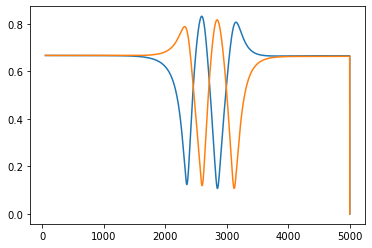

In [15]:
main()